# PMF, CDF, Joint Distribution
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* sajjad taghizadeh

*SID:* 810102425

The objective of this notebook is to understand the concepts of PMF and CDF and joint distribution.

In [1]:
import simpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Parameters

In [2]:
num_counters = 1
arrival_rate = 5  # customers per minute
service_rate = 6  # customers per minute
simulation_time = 10000  # minutes

## Simulation

In [3]:
def simulate_queue_system():
    """
    Simulates a queue system with customers arriving at service counters, waiting for service, and being served.

    This function defines the customer behavior and the setup of the simulation environment. It initializes the simulation environment, sets up the service counters, and continuously generates customer arrivals based on specified arrival and service rates. The function runs the simulation until the specified simulation time and returns the recorded wait times, arrival times, and service times of the customers.

    Returns:
        tuple: A tuple containing three lists - wait_times, arrival_times, and service_times, which record the respective times for each customer in the simulation.
    """

    def customer(
        env: simpy.Environment,
        name: str,
        counter: simpy.Resource,
        service_time: float,
        wait_times: list,
        arrival_times: list,
        service_times: list,
    ):
        """
        Simulates a customer arriving at a service counter, waiting for service, and then being served.

        Args:
            env (simpy.Environment): The simulation environment.
            name (str): The name of the customer.
            counter (simpy.Resource): The service counter resource.
            service_time (float): The time it takes to serve the customer.
            wait_times (list): A list to record the wait times of customers.
            arrival_times (list): A list to record the arrival times of customers.
            service_times (list): A list to record the service times of customers.

        Yields:
            simpy.events.Process: The process of the customer being served.
        """
        arrival_time = env.now
        arrival_times.append(arrival_time)
        with counter.request() as req:
            yield req
            yield env.timeout(service_time)
            service_times.append(service_time)
            wait_time = env.now - arrival_time
            wait_times.append(wait_time)

    def setup(
        env: simpy.Environment,
        num_counters: int,
        arrival_rate: float,
        service_rate: float,
        wait_times: list,
        arrival_times: list,
        service_times: list,
    ):
        """
        Sets up the simulation environment with a specified number of service counters and customer arrival and service rates.

        Args:
            env (simpy.Environment): The simulation environment.
            num_counters (int): The number of service counters available.
            arrival_rate (float): The rate at which customers arrive.
            service_rate (float): The rate at which customers are served.
            wait_times (list): A list to record the wait times of customers.
            arrival_times (list): A list to record the arrival times of customers.
            service_times (list): A list to record the service times of customers.

        Yields:
            simpy.events.Timeout: The timeout event for the next customer arrival.
        """
        counter = simpy.Resource(env, num_counters)
        while True:
            yield env.timeout(np.random.exponential(1 / arrival_rate))
            service_time = np.random.exponential(1 / service_rate)
            env.process(
                customer(
                    env,
                    "Customer",
                    counter,
                    service_time,
                    wait_times,
                    arrival_times,
                    service_times,
                )
            )

    while True:
        env = simpy.Environment()
        wait_times = []
        arrival_times = []
        service_times = []
        env.process(
            setup(
                env,
                num_counters,
                arrival_rate,
                service_rate,
                wait_times,
                arrival_times,
                service_times,
            )
        )
        env.run(until=simulation_time)

        if len(wait_times) == len(arrival_times) == len(service_times):
            return wait_times, arrival_times, service_times
        
wait_times, arrival_times, service_times = simulate_queue_system()

## Plot the RVs Distributions

<Axes: ylabel='Count'>

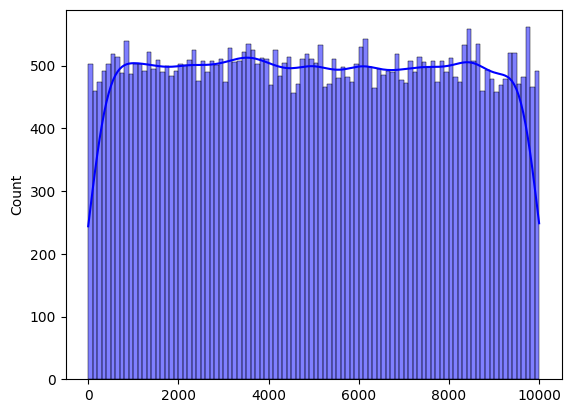

In [4]:
######################  TODO  ########################
# Distribution of Arrival Times
sns.histplot(arrival_times, bins=100, kde=True,color="blue")
######################  TODO  ########################

<Axes: ylabel='Count'>

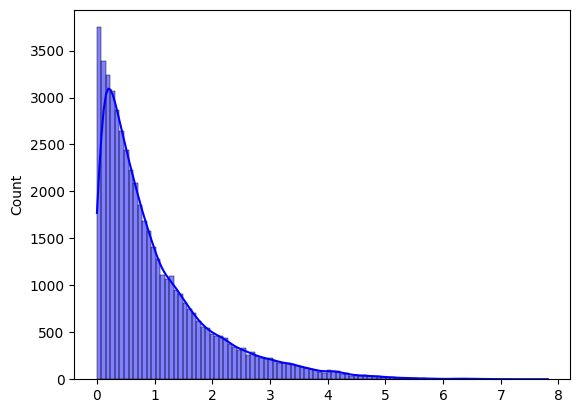

In [5]:
######################  TODO  ########################
# Distribution of Waiting Times
sns.histplot(wait_times, bins=100, kde=True,color="blue")
######################  TODO  ########################

<Axes: ylabel='Count'>

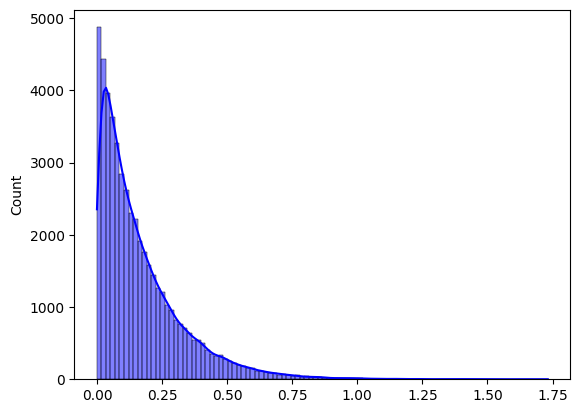

In [6]:
######################  TODO  ########################
# Distribution of Service Times
sns.histplot(service_times, bins=100, kde=True,color="blue")

######################  TODO  ########################

the KDE option in hisplot add a kernel density estimation plot on top of the histogram.

When you set kde=True in histplot
Computes the KDE for the dataset.
Overlays the KDE curve on top of the histogram.

we use KDE when we want a smooth continuous representation of your data's distribution.


## Plot the Joint Distributions

**Note:** Use `sns.jointplot` to plot the joint distributions

Text(37.722222222222214, 0.5, 'wait_times')

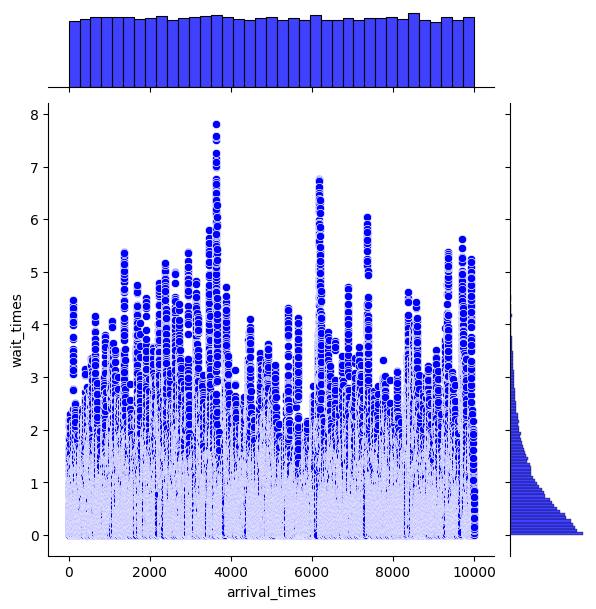

In [7]:
######################  TODO  ########################
# Joint Distribution of Arrival and Service Times
sns.jointplot(x=arrival_times,y=wait_times,color='blue')
plt.xlabel("arrival_times")
plt.ylabel("wait_times")
######################  TODO  ########################

Text(37.722222222222214, 0.5, 'service_times')

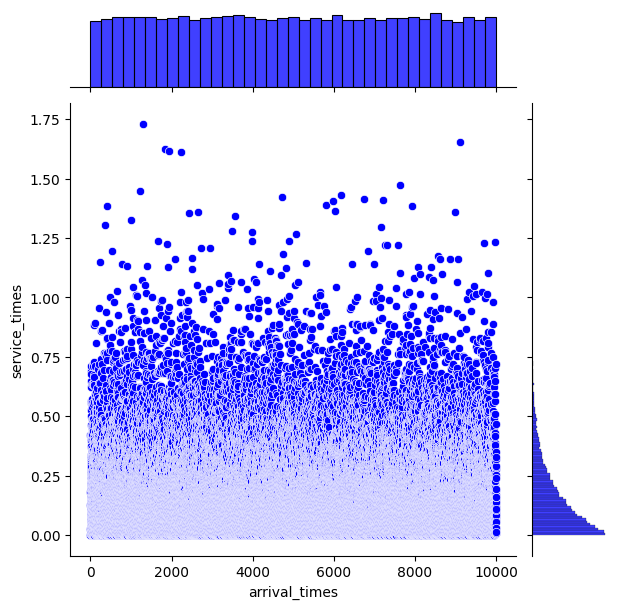

In [8]:
######################  TODO  ########################
# Joint Distribution of Arrival and Service Times
sns.jointplot(x=arrival_times,y=service_times,color='blue')
plt.xlabel("arrival_times")
plt.ylabel("service_times")
######################  TODO  ########################

## Analysis of Joint Distributions

TODO

Due to the shape, no direct and linear relationship is seen in this graph. For example, as can be seen, with increasing arrival time at some points in the graph, the change that occurs in service times is not a decrease or an increase.

## Scatter Plot and Correlation

Text(0, 0.5, 'wait_times')

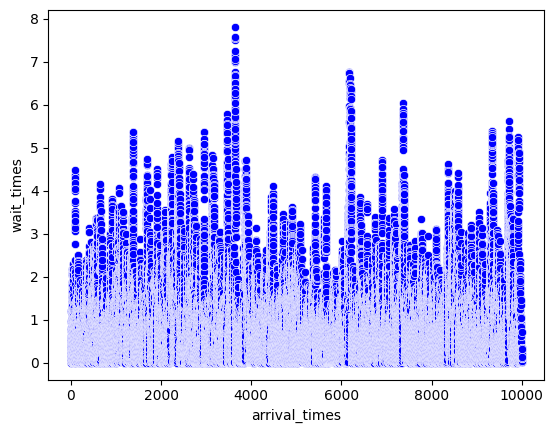

In [9]:
######################  TODO  ########################
# Scatter Plot of Arrival and Service Times
sns.scatterplot(x=arrival_times,y=wait_times,color="blue")
plt.xlabel("arrival_times")
plt.ylabel("wait_times")
######################  TODO  ########################

Correlation coefficient calculation function

In [27]:
def Correlation_Coefficient_calculator(x,y):
    covariance=np.cov(x, y)[0,1]
    variable=np.sqrt(np.var(x)*np.var(y))
    correlation_coefficient=covariance/variable
    return correlation_coefficient

Correlation_Coefficient_calculator(arrival_times,wait_times)
np.corrcoef(arrival_times,wait_times)


array([[1.        , 0.00555964],
       [0.00555964, 1.        ]])

with ready function and manually version i code  twice 

## Calculating `total_times`

Text(0.5, 0, 'total_time')

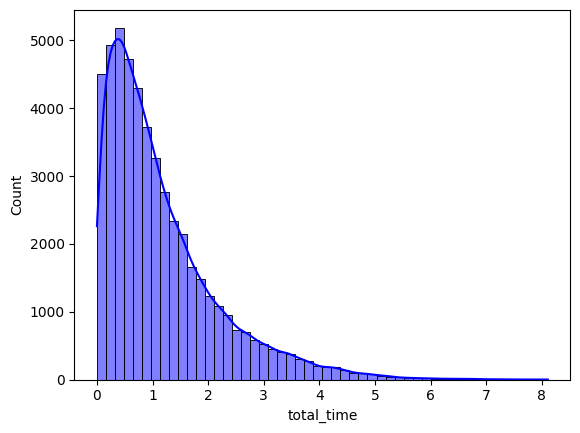

In [11]:
######################  TODO  ########################
# Distribution of Total Time Spent in the System
total_time=np.array( service_times)+np.array( wait_times)
sns.histplot(total_time, bins=50, kde=True,color="blue")
plt.xlabel("total_time")


######################  TODO  ########################

Since, according to the question, the distribution of service time and waiting time follows an exponential distribution, the sum of the two exponential distributions apparently follows a distribution called the gamma distribution, and according to my research on the Internet, the shape of the graph drawn also shows a type of graph that is from the gamma distribution.

## Conditional Wait Times

Text(0.5, 0, 'total_time2')

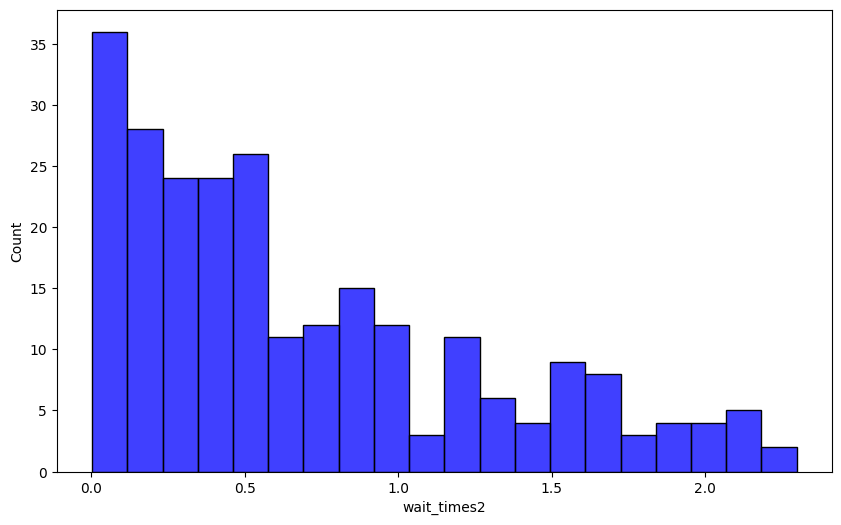

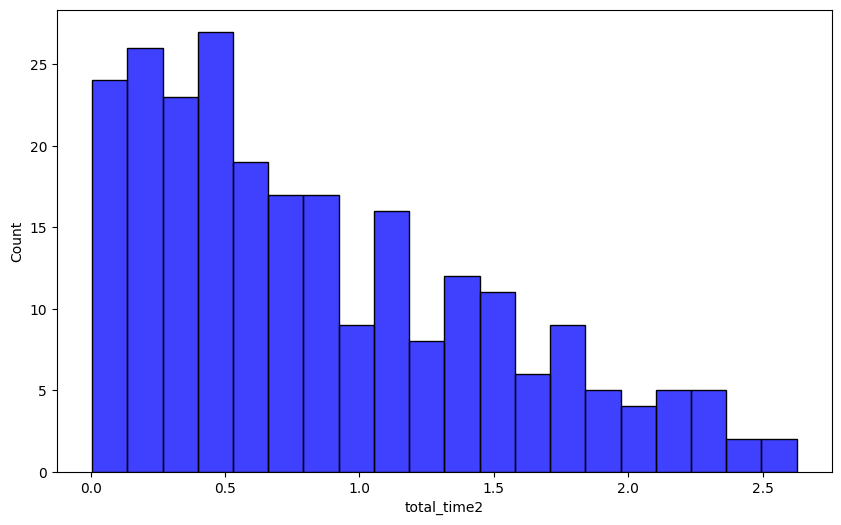

In [12]:
######################  TODO  ########################
# Conditional Distribution of Waiting Times (Arrival Time < 50)
arrival_times2 = np.array(arrival_times) <50
wait_times2 =np.array(wait_times)[arrival_times2]
total_time2 =total_time[arrival_times2]

plt.figure(figsize=(10,6))

sns.histplot(wait_times2, bins=20, color="blue")
plt.xlabel("wait_times2")

plt.figure(figsize=(10,6))
sns.histplot(total_time2, bins=20,color="blue")
plt.xlabel("total_time2")
######################  TODO  ########################

Applying the condition that the arrival times are less than 50 does not change the distributions themselves. There is simply a smaller range of people whose arrival times are less than 50. As a result, we need to obtain their waiting time and total time, whose distribution, according to the previous data, will be the waiting time for Tom and the gamma for the total time.